In [1]:
# Import necessary modules

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the images directories
path = "/content/drive/MyDrive/Brain_Tumor_Dataset"
print(os.listdir(path))

image_paths = list(paths.list_images(path))
print(len(image_paths))

['yes', 'no', 'brain_tumor_dataset']
506


In [6]:
#
images = []
labels = []

for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    images.append(image)
    labels.append(label)

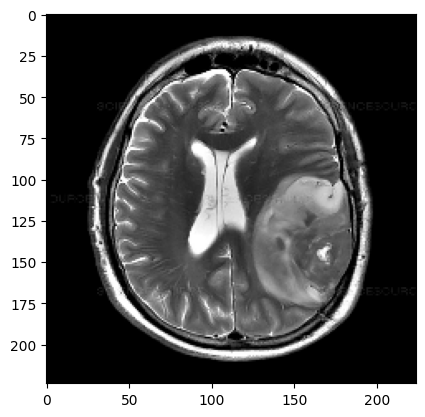

In [7]:
# Plot an image
def plot_image(image):
    plt.imshow(image)

plot_image(images[0])

#Conver into Numpy Arrays

In [8]:
# Convert into numpy arrays
images = np.array(images) / 255.0
labels = np.array(labels)

## Perform One-hot encoding

In [9]:
# Perform One-hot encoding
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

print(labels[0])

[0. 1.]


#Split the dataset

In [10]:
#Split the dataset
(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.3, random_state= 42, stratify= labels)

# Build the Image Data Generator

In [11]:
# Build the Image Data Generator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

# Build the model

In [ ]:
# # Build the model
# base_model = VGG16(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
# base_input = base_model.input
# base_output = base_model.output
# base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
# base_output = Flatten(name="flatten")(base_output)
# base_output = Dense(64, activation="relu")(base_output)
# base_output = Dropout(0.5)(base_output)
# base_output = Dense(2, activation="softmax")(base_output)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [ ]:
# Let's see the architecture summary of our model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
batch_size = 8
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 10

In [ ]:
# Fit the model
history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size),
                              steps_per_epoch= train_steps,
                              validation_data = (test_X, test_Y),
                              validation_steps= validation_steps,
                              epochs= epochs)

Epoch 1/10


<ipython-input-30-261dfbd5bc3e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size),


56/56 [==============================] - 18s 240ms/step - loss: 0.6409 - accuracy: 0.6913 - val_loss: 0.4701 - val_accuracy: 0.8235
Epoch 2/10
56/56 [==============================] - 6s 102ms/step - loss: 0.4782 - accuracy: 0.7875 - val_loss: 0.4208 - val_accuracy: 0.8235
Epoch 3/10
56/56 [==============================] - 6s 98ms/step - loss: 0.3819 - accuracy: 0.8479 - val_loss: 0.4111 - val_accuracy: 0.8627
Epoch 4/10
56/56 [==============================] - 5s 97ms/step - loss: 0.3137 - accuracy: 0.8993 - val_loss: 0.4174 - val_accuracy: 0.8431
Epoch 5/10
56/56 [==============================] - 7s 116ms/step - loss: 0.2641 - accuracy: 0.9016 - val_loss: 0.3596 - val_accuracy: 0.8235
Epoch 6/10
56/56 [==============================] - 5s 98ms/step - loss: 0.2578 - accuracy: 0.9016 - val_loss: 0.3277 - val_accuracy: 0.8235
Epoch 7/10
56/56 [==============================] - 7s 124ms/step - loss: 0.2125 - accuracy: 0.9262 - val_loss: 0.3184 - val_accuracy: 0.8627
Epoch 8/10
56/56 [=

In [ ]:
# Evaluate the model
predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

7/7 [==============================] - 2s 291ms/step


In [ ]:
# Print Classification report and Confusion matrix
print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

          no       0.64      0.90      0.75        20
         yes       0.91      0.68      0.78        31

    accuracy                           0.76        51
   macro avg       0.78      0.79      0.76        51
weighted avg       0.81      0.76      0.77        51

[[18  2]
 [10 21]]


In [ ]:
# Final accuracy of our model
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.7647


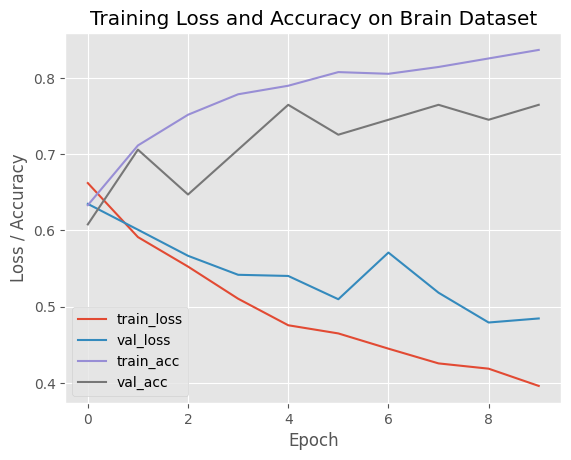

In [ ]:
# Plot the losses and accuracies
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")

#Training Using InseptionV3 Model

In [20]:
# from tensorflow.keras.applications import InceptionV3
# from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import BatchNormalization
# # Build the model with InceptionV3
# base_model = InceptionV3(weights='imagenet', input_tensor=Input(shape=(224, 224, 3)), include_top=False)
# base_input = base_model.input
# base_output = base_model.output
# base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
# base_output = Flatten(name="flatten")(base_output)
# base_output = BatchNormalization()(base_output)
# base_output = Dense(64, activation="relu")(base_output)
# base_output = Dropout(0.5)(base_output)
# base_output = Dense(2, activation="sigmoid")(base_output)

# # Create the model
# model = Model(inputs=base_input, outputs=base_output)

# # Compile the model
# from tensorflow.keras.optimizers import Adam
# model.compile(optimizer=Adam(learning_rate= 1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# # Compile the model
# model = Model(inputs = base_input, outputs = base_output)
# model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [22]:
# Let's see the architecture summary of our model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [23]:
batch_size = 16
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 30

In [24]:
# Fit the model
history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size),
                              steps_per_epoch= train_steps,
                              validation_data = (test_X, test_Y),
                              validation_steps= validation_steps,
                              epochs= epochs)

<ipython-input-24-261dfbd5bc3e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size),


Epoch 1/30
22/22 [==============================] - 37s 286ms/step - loss: 0.9771 - accuracy: 0.5917 - val_loss: 0.7361 - val_accuracy: 0.5197
Epoch 2/30
22/22 [==============================] - 6s 268ms/step - loss: 0.9181 - accuracy: 0.6331 - val_loss: 0.7856 - val_accuracy: 0.5329
Epoch 3/30
22/22 [==============================] - 5s 213ms/step - loss: 0.6870 - accuracy: 0.6923 - val_loss: 0.7691 - val_accuracy: 0.5461
Epoch 4/30
22/22 [==============================] - 5s 221ms/step - loss: 0.5424 - accuracy: 0.7485 - val_loss: 0.6938 - val_accuracy: 0.5855
Epoch 5/30
22/22 [==============================] - 7s 309ms/step - loss: 0.5372 - accuracy: 0.7722 - val_loss: 0.6442 - val_accuracy: 0.6382
Epoch 6/30
22/22 [==============================] - 5s 217ms/step - loss: 0.5187 - accuracy: 0.7811 - val_loss: 0.6007 - val_accuracy: 0.6645
Epoch 7/30
22/22 [==============================] - 5s 241ms/step - loss: 0.4132 - accuracy: 0.8314 - val_loss: 0.5894 - val_accuracy: 0.6974
Epoch

In [25]:
# Evaluate the model
predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

10/10 [==============================] - 5s 48ms/step


In [26]:
# Print Classification report and Confusion matrix
print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

          no       0.90      0.93      0.92        59
         yes       0.96      0.94      0.95        93

    accuracy                           0.93       152
   macro avg       0.93      0.93      0.93       152
weighted avg       0.93      0.93      0.93       152

[[55  4]
 [ 6 87]]


In [27]:
# Final accuracy of our model
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9342


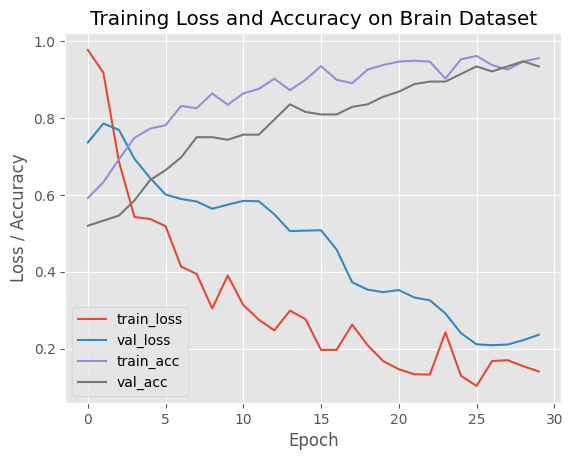

In [28]:
# Plot the losses and accuracies
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")

#Training the Data using CNN Model

In [107]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization

# Build the custom CNN model
input_tensor = Input(shape=(224, 224, 3))

# Convolutional layer 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
x = MaxPooling2D((2, 2))(x)

# Convolutional layer 2
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Convolutional layer 3
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Convolutional layer 4
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Add average pooling and flatten the output
x = AveragePooling2D(pool_size=(4, 4))(x)
x = Flatten(name="flatten")(x)

# Fully connected layer
x = Dense(256, activation='relu')(x)
base_output = BatchNormalization()(base_output)
x = Dropout(0.5)(x)


# Output layer
output_tensor = Dense(2, activation='sigmoid')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate= 1e-3), loss='binary_crossentropy', metrics=['accuracy'])


In [108]:
# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

In [109]:
# # Compile the model
# model = Model(inputs = base_input, outputs = base_output)
# model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [110]:
# Let's see the architecture summary of our model
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_240 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_241 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_242 (Conv2D)         (None, 56, 56, 128)       738

In [111]:
batch_size = 16
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 30

In [117]:
# Fit the model
history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size),
                              steps_per_epoch= train_steps,
                              validation_data = (test_X, test_Y),
                              validation_steps= validation_steps,
                              epochs= epochs)

<ipython-input-117-261dfbd5bc3e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator.flow(train_X, train_Y, batch_size= batch_size),


Epoch 1/30
22/22 [==============================] - 6s 284ms/step - loss: 0.1404 - accuracy: 0.9645 - val_loss: 0.2414 - val_accuracy: 0.8750
Epoch 2/30
22/22 [==============================] - 4s 168ms/step - loss: 0.1101 - accuracy: 0.9631 - val_loss: 0.2980 - val_accuracy: 0.8684
Epoch 3/30
22/22 [==============================] - 5s 241ms/step - loss: 0.1168 - accuracy: 0.9556 - val_loss: 0.2589 - val_accuracy: 0.8684
Epoch 4/30
22/22 [==============================] - 4s 170ms/step - loss: 0.1678 - accuracy: 0.9320 - val_loss: 0.4141 - val_accuracy: 0.8816
Epoch 5/30
22/22 [==============================] - 4s 170ms/step - loss: 0.1105 - accuracy: 0.9645 - val_loss: 0.2497 - val_accuracy: 0.8882
Epoch 6/30
22/22 [==============================] - 6s 262ms/step - loss: 0.1074 - accuracy: 0.9716 - val_loss: 0.3443 - val_accuracy: 0.8750
Epoch 7/30
22/22 [==============================] - 4s 170ms/step - loss: 0.1036 - accuracy: 0.9734 - val_loss: 0.3103 - val_accuracy: 0.8947
Epoch 

In [118]:
# Evaluate the model
predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

10/10 [==============================] - 0s 11ms/step


In [119]:
# Print Classification report and Confusion matrix
print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

          no       0.93      0.86      0.89        59
         yes       0.92      0.96      0.94        93

    accuracy                           0.92       152
   macro avg       0.92      0.91      0.92       152
weighted avg       0.92      0.92      0.92       152

[[51  8]
 [ 4 89]]


In [120]:
# Final accuracy of our model
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9211


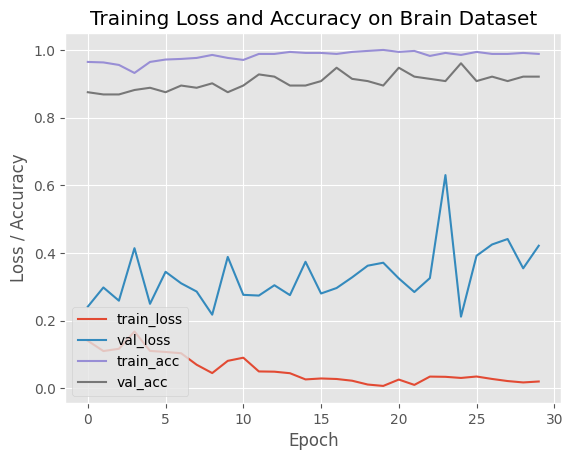

In [121]:
# Plot the losses and accuracies
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")